# Imbalanced learn

In [1]:
# pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from termcolor import colored

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

Read in training data:

In [3]:
X_train = pd.read_csv('../data/train/X_train.csv')
y_train_type = np.ravel(pd.read_csv('../data/train/y_train_type.csv'))
y_train_age = np.ravel(pd.read_csv('../data/train/y_train.csv'))

Read in test data:

In [4]:
X_test = pd.read_csv('../data/test/X_test.csv')
y_test_type = np.ravel(pd.read_csv('../data/test/y_test_type.csv'))
y_test_age = np.ravel(pd.read_csv('../data/test/y_test.csv'))

In [5]:
def showHist(data):
#     plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,8))
    plt.hist(data)
    plt.xticks(rotation=50)
    plt.title("Histogram")
    plt.show()

In [6]:
def predictAndReport(model, X, Y):
    pred = model.predict(X)
    print('Confusion matrix: \n', confusion_matrix(Y, pred))
    print('\nClassification report: \n', classification_report(Y, pred, zero_division=True))

In [7]:
def getBestParams(X, y):
    params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False]
         }

    multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=3, verbose=5)
    multinomial_nb_grid.fit(X,y)

    print('Best accuracy : {:.3f}'.format(multinomial_nb_grid.best_score_))
    return multinomial_nb_grid.best_params_['alpha'], multinomial_nb_grid.best_params_['fit_prior']

# -----------------------------------------------------------------------------------------------

# Classes from atribute type 

In [8]:
# X_train_type, X_val_type, y_train_type, y_val_type = train_test_split(X_train, y_train_type, train_size=0.7)

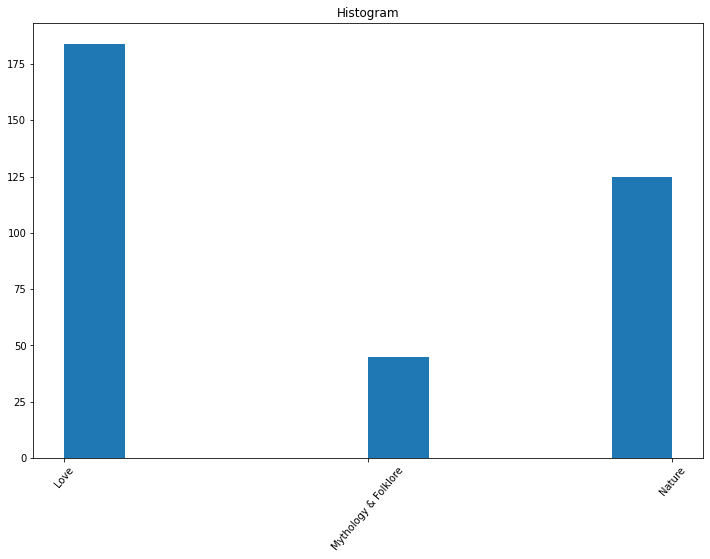

In [9]:
showHist(y_train_type)

## SVM without any imbalanced learn method

In [30]:
model = svm.SVC(C=0.2, kernel='linear', degree=3, probability=False)
model.fit(X_train, y_train_type)

SVC(C=0.2, kernel='linear')

Prediction on train data:

In [31]:
predictAndReport(model, X_train, y_train_type)

Confusion matrix: 
 [[184   0   0]
 [ 43   0   2]
 [108   0  17]]

Classification report: 
                       precision    recall  f1-score   support

                Love       0.55      1.00      0.71       184
Mythology & Folklore       1.00      0.00      0.00        45
              Nature       0.89      0.14      0.24       125

            accuracy                           0.57       354
           macro avg       0.81      0.38      0.32       354
        weighted avg       0.73      0.57      0.45       354



## SVM with over sampling method

In [13]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=23, random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_type)

In [14]:
model = svm.SVC(C=0.2, kernel='linear', degree=3, probability=False)

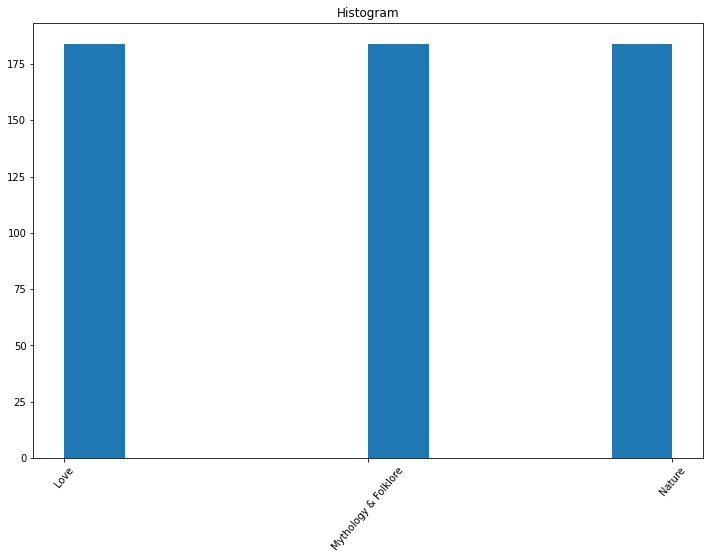

In [15]:
showHist(y_resampled)

In [16]:
model.fit(X_resampled, y_resampled)

SVC(C=0.2, kernel='linear')

Prediction on train data:

In [17]:
predictAndReport(model, X_train, y_train_type)

Confusion matrix: 
 [[181   0   3]
 [  9  32   4]
 [ 71   0  54]]

Classification report: 
                       precision    recall  f1-score   support

                Love       0.69      0.98      0.81       184
Mythology & Folklore       1.00      0.71      0.83        45
              Nature       0.89      0.43      0.58       125

            accuracy                           0.75       354
           macro avg       0.86      0.71      0.74       354
        weighted avg       0.80      0.75      0.73       354



### Prediction on test data:

In [18]:
predictAndReport(model, X_test, y_test_type)

Confusion matrix: 
 [[94  0  0]
 [10  3  1]
 [29  0 15]]

Classification report: 
                       precision    recall  f1-score   support

                Love       0.71      1.00      0.83        94
Mythology & Folklore       1.00      0.21      0.35        14
              Nature       0.94      0.34      0.50        44

            accuracy                           0.74       152
           macro avg       0.88      0.52      0.56       152
        weighted avg       0.80      0.74      0.69       152



# -----------------------------------------------------------------------------------------------

# Classes from atribute age 

In [19]:
# X_train_age, X_val_age, y_train_age, y_val_age = train_test_split(X_train, y_train_age, train_size=0.7)

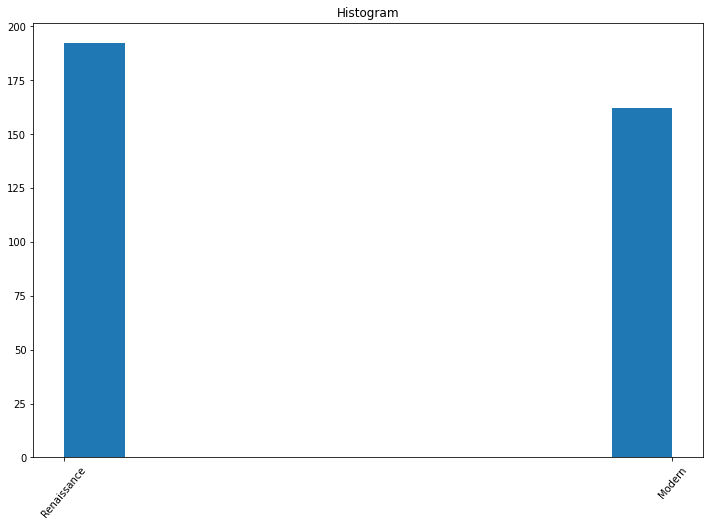

In [20]:
showHist(y_train_age)

## SVM without any imbalanced learn method

In [21]:
alpha, fp = getBestParams(X_train, y_train_age)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best accuracy : 0.912


In [22]:
model = svm.SVC(C=0.5, kernel='linear', degree=3, probability=False)
model.fit(X_train, y_train_age)

SVC(C=0.5, kernel='linear')

Prediction on train data:

In [23]:
predictAndReport(model, X_train, y_train_age)

Confusion matrix: 
 [[160   2]
 [  0 192]]

Classification report: 
               precision    recall  f1-score   support

      Modern       1.00      0.99      0.99       162
 Renaissance       0.99      1.00      0.99       192

    accuracy                           0.99       354
   macro avg       0.99      0.99      0.99       354
weighted avg       0.99      0.99      0.99       354



## SVM with over sampling method

In [24]:
smote = SMOTE(sampling_strategy='all', k_neighbors=23, random_state = 1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_age)

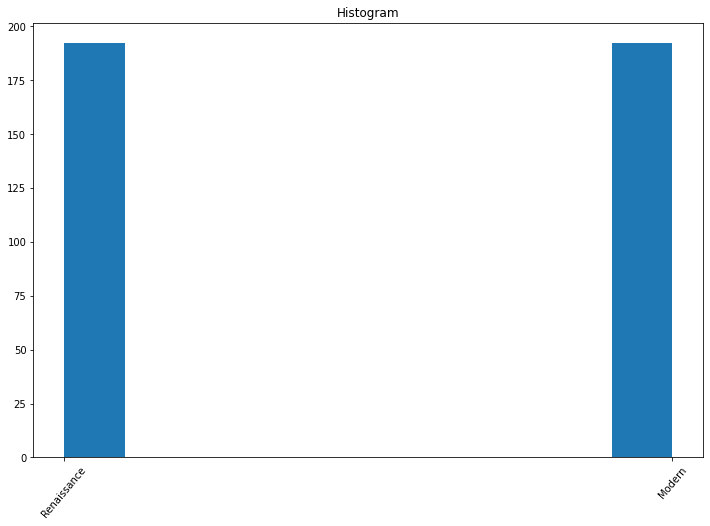

In [25]:
showHist(y_resampled)

In [26]:
model = svm.SVC(C=0.5, kernel='linear', degree=3, probability=False)

In [27]:
model.fit(X_resampled, y_resampled)

SVC(C=0.5, kernel='linear')

Prediction on train data:

In [28]:
predictAndReport(model, X_resampled, y_resampled)

Confusion matrix: 
 [[192   0]
 [  0 192]]

Classification report: 
               precision    recall  f1-score   support

      Modern       1.00      1.00      1.00       192
 Renaissance       1.00      1.00      1.00       192

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



### Prediction on test data:

In [29]:
predictAndReport(model, X_test, y_test_age)

Confusion matrix: 
 [[54  6]
 [ 5 87]]

Classification report: 
               precision    recall  f1-score   support

      Modern       0.92      0.90      0.91        60
 Renaissance       0.94      0.95      0.94        92

    accuracy                           0.93       152
   macro avg       0.93      0.92      0.92       152
weighted avg       0.93      0.93      0.93       152

